# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action ='ignore')

In [9]:
#tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips') # toy dataset :seeborn 에서 지원하는
tips.shape

(244, 7)

In [4]:
import pandas as pd

In [5]:
pd.date_range('2000/1/1', freq= 'MS', periods = 5)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', freq='MS')

## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [6]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

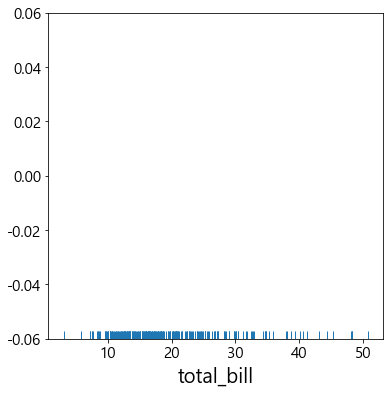

In [9]:
plt.figure(figsize =(6,6))
sns.rugplot(x = tips['total_bill'])  # x 첫번째 매개변수이기때문에 생략가능
plt.show()                            #값들의 분포를 파악// x축만 갖고 그림

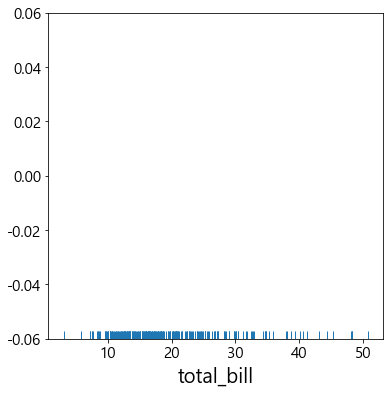

In [11]:
plt.figure(figsize =(6,6))
sns.rugplot('total_bill', data = tips);
# 컬럼명 : 문자열
# data : DataFrame객체

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

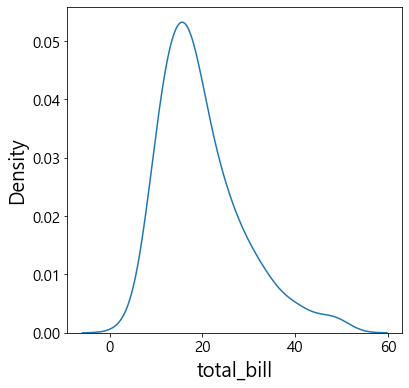

In [13]:
plt.figure(figsize =(6,6))
sns.kdeplot(tips['total_bill'])
plt.show()

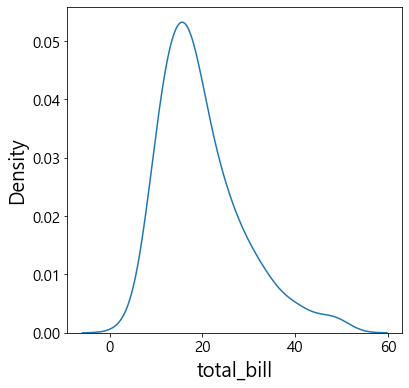

In [14]:
plt.figure(figsize =(6,6))
sns.kdeplot('total_bill', data = tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.  ---> 
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

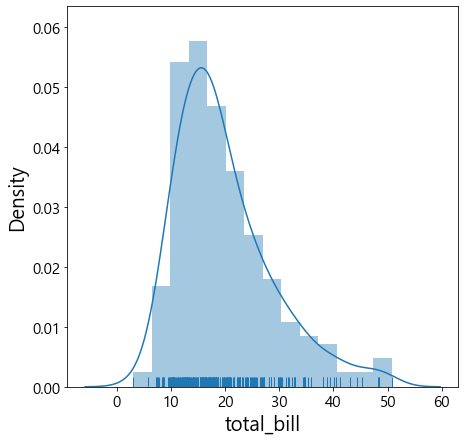

In [41]:
import warnings
warnings.filterwarnings(action ='ignore')

plt.figure(figsize =(7,7))
#sns.displot('total_bill', data = tips) # displot은 dataframe 과 컬럼을 나눠서 지정하지 못한다.
sns.distplot(tips['total_bill'],
            rug = True, # rug 만 False 가 default
            kde= True,
            hist=True)
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

- violinplot() : box 자리에 히스토그램을 그림


### boxplot

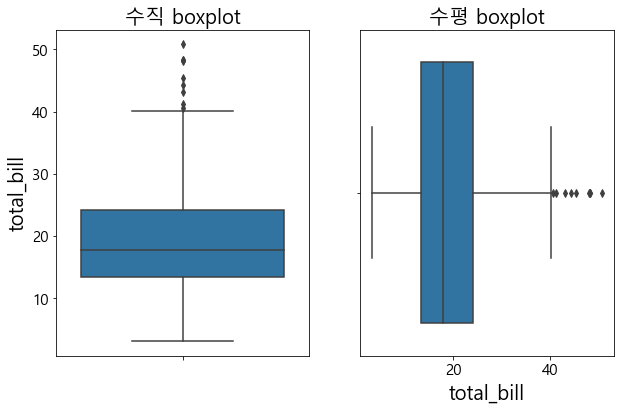

In [25]:
# seaborn 을 사용한 total_bill 의 boxplot을 하나의 figure에 두개를 그린다. (수직,수평)

plt.figure(figsize =(10,6))
plt.subplot(1,2,1)
sns.boxplot(y= tips['total_bill'])# 수직 
plt.title('수직 boxplot')


plt.subplot(1,2,2)
sns.boxplot(x = tips['total_bill'])
#sns.boxplot('total_bill', data = tips)
plt.title('수평 boxplot')


plt.show()


In [27]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

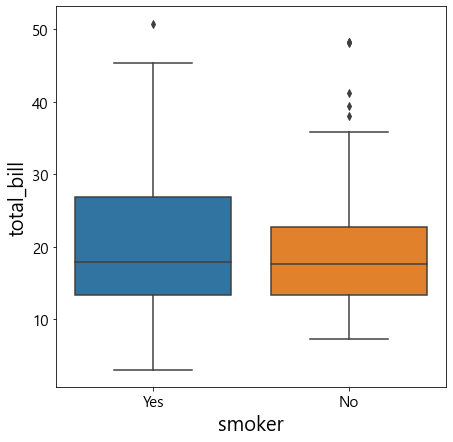

In [35]:
# seaborn을 사용하여  smoker 별  total_bill의 분포를  boxplot을 그린다.

plt.figure(figsize=(7,7))

sns.boxplot(y= 'total_bill', x= 'smoker', data = tips) # 각종 그래프그리기2 에 잇는것과 비교해서 보기


# y(x)축 : 분포를 보려는 연속형 값의 컬럼, x(y)축 : 그룹을 나누려는 범주형 컬럼.
plt.show()

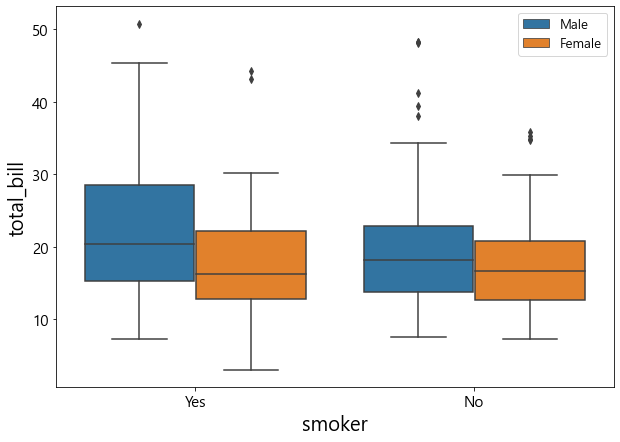

In [34]:
# seabor을 smoker 별  total_bill의 분포를 성별로  boxplot을 그린다.

plt.figure(figsize=(10,7))

sns.boxplot(y= 'total_bill', x= 'smoker', hue ='sex', data = tips) # 각종 그래프그리기2 에 잇는것과 비교해서 보기
plt.legend(fontsize = 13)
# hue : sex 별 다른색깔로 해라 ---> 나누라는 뜻이 된다.
# y(x)축 : 분포를 보려는 연속형 값의 컬럼, x(y)축 : 그룹을 나누려ㅕ는 범주형 컬럼.
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density, kde)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

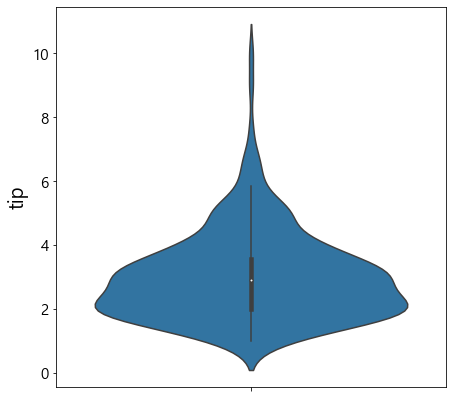

In [11]:
plt.figure(figsize=(7,7))
#sns.violinplot(y = "tip", data = tips)  # distplot은 dataframe 과 컬럼을 나눠서 지정하지 못한다.
sns.violinplot(y = tips['tip'])
plt.show()  # 분포까지도 확인할 수 있다.// boxplot

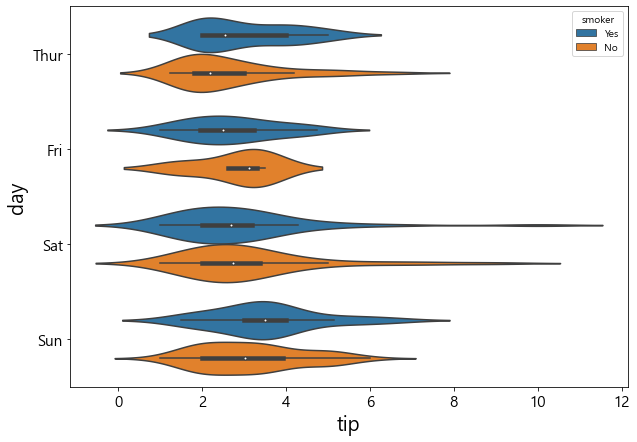

In [51]:
# 요일별(day) tip의 분포
plt.figure(figsize=(10,7))

# sns.violinplot(y= 'tip', x = 'day', data = tips)
#sns.violinplot(y= 'tip', x = 'day', hue = 'smoker',data = tips) #- 요일, 흡연자의 tip 분포 
sns.violinplot(x= 'tip', y = 'day',hue = 'smoker', data = tips)
plt.show()

### swarmplot
- swarm : 군중, 떼 //한방향으로 움직이는 
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 ""실제 값이 있는 위치에 점을 찍으므로"" 좀더 정확하게 값이 어디에 있는지 알 수 있다.

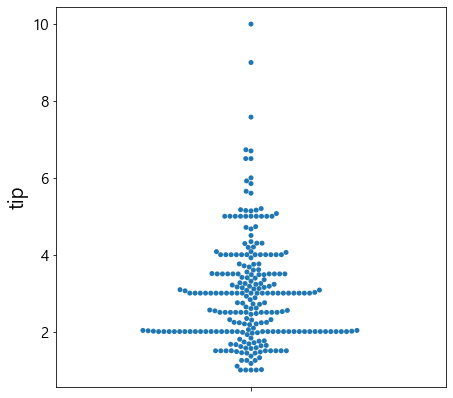

In [53]:
plt.figure(figsize =(7,7))
sns.swarmplot(y = 'tip', data = tips)
plt.show()

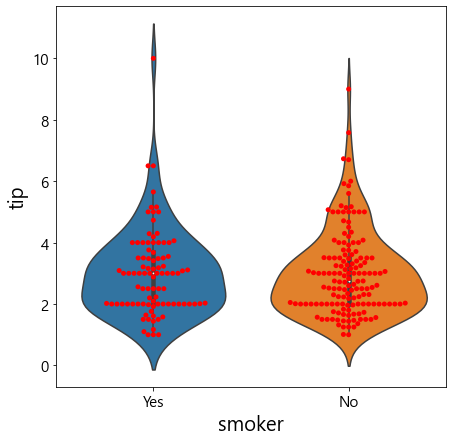

In [13]:

plt.figure(figsize =(7,7))

#sns.boxplot(y = 'tip', data = tips)
sns.violinplot(x='smoker' ,y = 'tip', data = tips)
sns.swarmplot(x='smoker',y = 'tip', data = tips, color ='r')  # swarmplot 은 주로 이런식으로 보조해주는 역할로 쓰인다.

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

In [14]:
a = tips['day'].value_counts() #--> matplotlib , pandas 사용해서 그릴때는 이렇게 개수를 구한다음에 그래프를 그려야만 했따.
a                          # seeborn 에서는 이러한 과정을 거치지 않아도 알아서 처리해서 그래프를 그려준다.

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

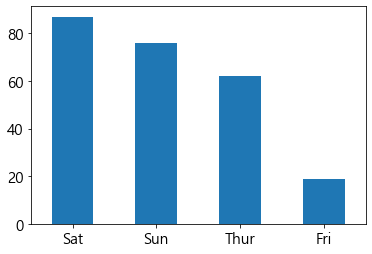

In [19]:
# plt.bar(a.index,a)
a.plot(kind = 'bar',rot= 0)
plt.show()

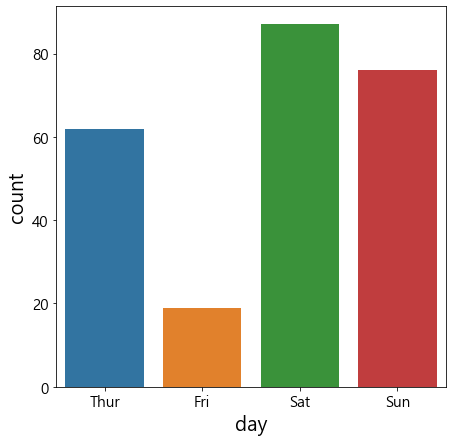

In [60]:
plt.figure(figsize=(7,7))

# 범주형 컬럼을 지정하면 고유값별로 개수를 세서 막대 그래프를 그려준다~~!
sns.countplot(x= 'day', data = tips)  # 색 통일도 가능~!
plt.show()

In [61]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

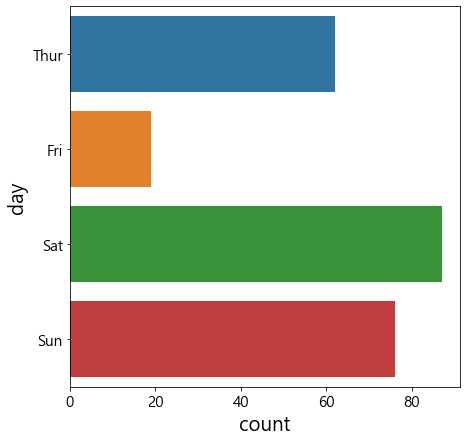

In [65]:
plt.figure(figsize=(7,7))

# 범주형 컬럼을 지정하면 고유값별로 개수를 세서 막대 그래프를 그려준다~~!
sns.countplot(y= 'day', data = tips)  # 색 통일도 가능~!
plt.show()

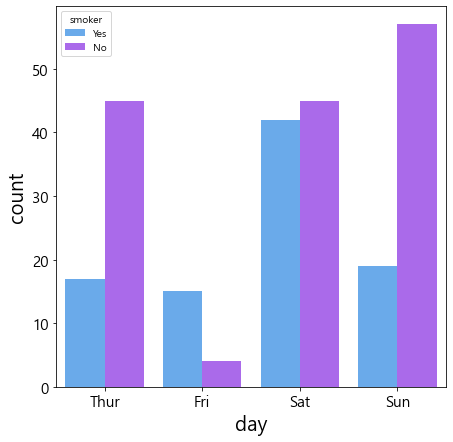

In [74]:
# 요일별 흡연여부별로 
plt.figure(figsize =(7,7))

sns.countplot(x = 'day', hue = 'smoker', data = tips, palette = 'cool')

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
# x,y 를 다알려줘야함 

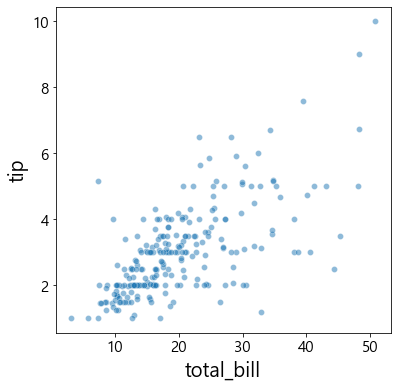

In [69]:
 
plt.figure(figsize =(6,6))

sns.scatterplot(x ='total_bill' , y = 'tip', data = tips, alpha = 0.5)
plt.show()

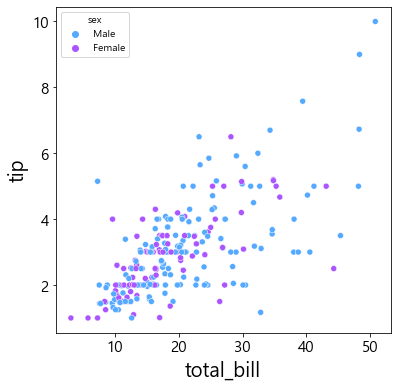

In [75]:
# 성별로 나눠서 확인 

plt.figure(figsize =(6,6))

sns.scatterplot(x ='total_bill' , y = 'tip', hue = 'sex', data = tips, palette='cool') 
#colormap지정 : matplotlib/pandas :cmap,/// seborn: palette


plt.show()

In [76]:
tips[['total_bill','tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
- linear model (lm)

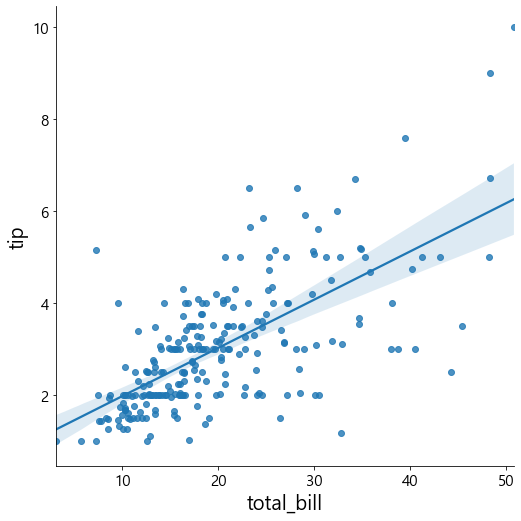

In [81]:
# 예측하려는 값 Y, 예측에 도움을 주는 컬럼 X
#plt.figure(figsize=(7,7)) ---> 적용안됨,, height로 사용해야함 
# 상관관계..
# totalbill을 가지고 tip을 예측
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, height = 7, palette ='cool')
plt.show()

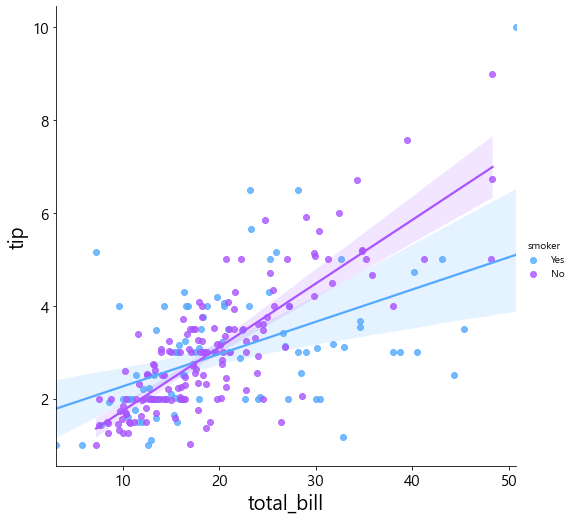

In [82]:
sns.lmplot(x = 'total_bill', y = 'tip',hue = 'smoker', data = tips, height = 7, palette ='cool')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

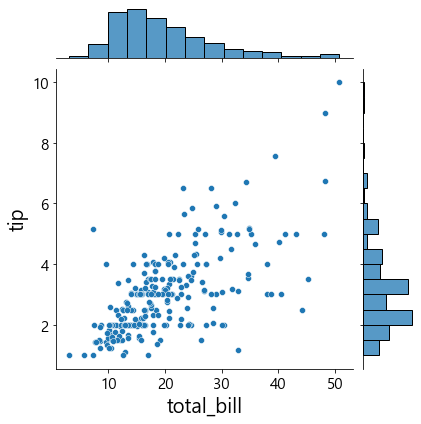

In [84]:
sns.jointplot(x = 'total_bill', y = 'tip', data= tips)
plt.show()

### pairplot
- 짝지어서 그래프를 그린다     

- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [86]:
tips.select_dtypes(include='number')

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


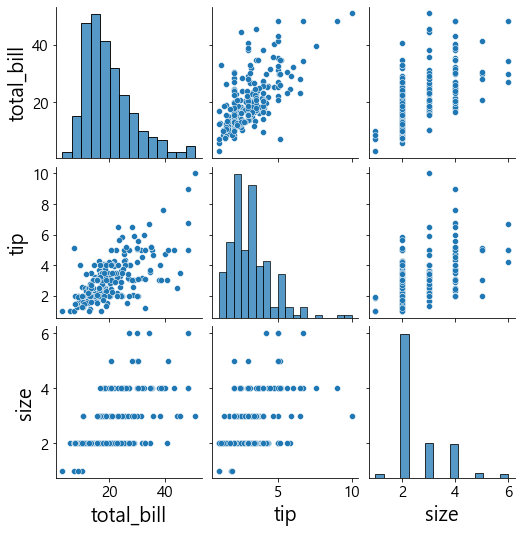

In [88]:
sns.pairplot(tips)  # 컬럼, 데이터가 많을 수록 그릴때 많은 시간이 걸린다.// 수직으로 줄그은 것 같은 그래프--> 거의 범주형 일 가능성 높다.
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화


---- matplot 에서는 imshow 사용해서 그렸었음!

In [90]:
tips.corr()  # 컬럼간 상관관계

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


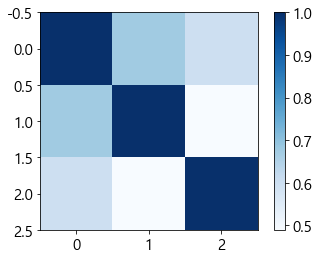

In [95]:
plt.imshow(tips.corr(), cmap = 'Blues') # matplot 사용한 heatmap\
plt.colorbar()
plt.show()

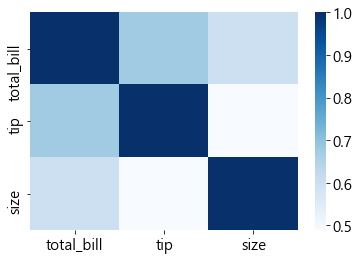

In [21]:
sns.heatmap(tips.corr(), cmap = 'Blues',)#annot = True)

plt.show()  # 자동으로 tick 들을설정하고 colorbar도 보여줌 

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [23]:
# 2021.1.1 부터  
index = pd.date_range('2021/1/1', freq = 'D', periods= 10)
value = np.random.randint(1,100, size = (10,3))
df = pd.DataFrame(data= value, index = index, columns = list('ABC'))
df

,A,B,C
2021-01-01,3,61,53
2021-01-02,91,63,90
2021-01-03,38,59,98
2021-01-04,74,50,96
2021-01-05,33,62,92
2021-01-06,15,6,74
2021-01-07,83,15,80
2021-01-08,71,57,37
2021-01-09,97,80,58
2021-01-10,52,16,37


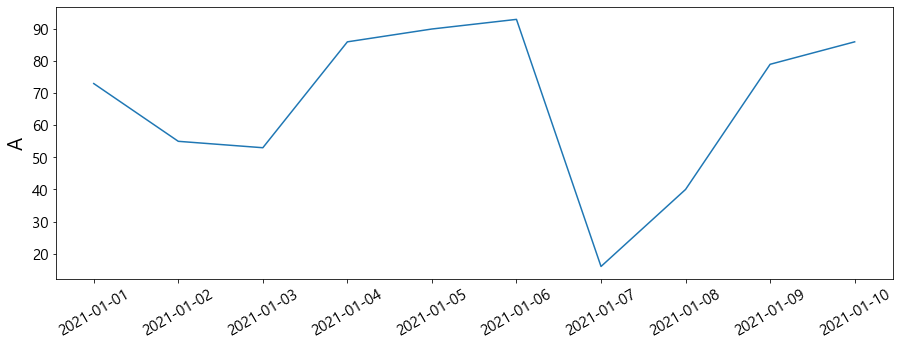

In [111]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df.index ,y = "A", data = df) 
# 원래는 컬럼을 지정했었다.// 날짜를 넣고 싶은데 그게 index이고 // 만약 그냥 index를 넣으면 index 컬럼을 넣으라는것이기때문에 
plt.xticks(df.index, rotation = 30)

plt.show()